In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
# Download historical data for Apple Inc. from Yahoo finance
df = yf.download('AAPL', start='2016-01-01', end='2021-12-31')

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.074738,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.471441,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.012117,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.040897,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.157442,283192000


In [3]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

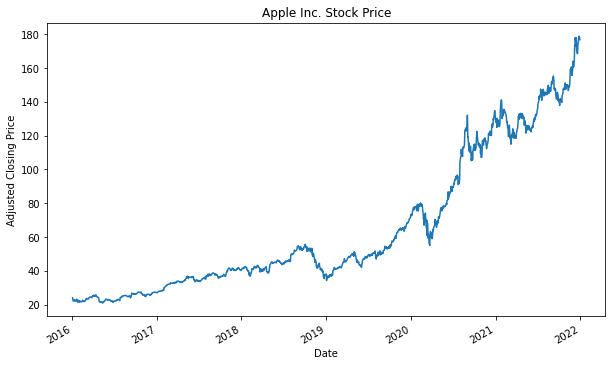

In [4]:
df['Adj Close'].plot(figsize=(10, 6), title='Apple Inc. Stock Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

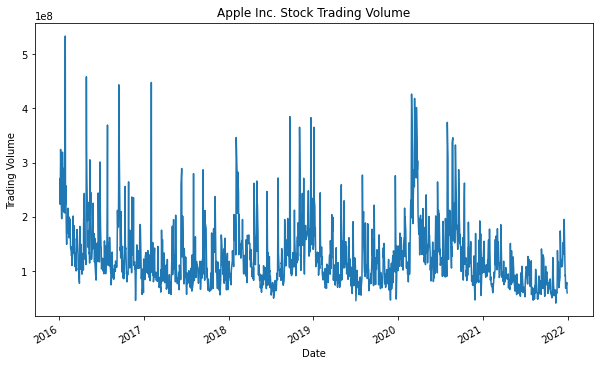

In [5]:
df['Volume'].plot(figsize=(10, 6), title='Apple Inc. Stock Trading Volume')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()

In [6]:
# Create a new column 'target' representing the stock price of the next day
df['target'] = df['Adj Close'].shift(-1)

# Drop the last row containing NaN value for the target
df.dropna(inplace = True)

In [7]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
target       0
dtype: int64

In [8]:
# Split the data into training and testing sets
# The reason we chose this specific date is that it is a commonly used practice 
# in finance to split data based on a specific point in time, and January 1st is
# a convenient date to use as it marks the beginning of a new year.

split_date = '2021-01-01'
train_df = df[df.index < split_date]
test_df = df[df.index >= split_date]

# Create the feature matrix X and target variable y for training and testing sets
X_train = train_df.drop(['target'], axis=1)
y_train = train_df['target']
X_test = test_df.drop(['target'], axis=1)
y_test = test_df['target']

Model Building

In [9]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the test set using the trained model
y_pred = model.predict(X_test)

# Evaluate the performance of the model using root mean squared error (RMSE) and R-squared metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R-squared:", r2)

RMSE: 2.180573369796849
R-squared: 0.9775680962502393


In [10]:
# Predict the future stock prices for the year 2022
future_df = yf.download('AAPL', start='2022-01-01', end='2022-12-31')
future_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.683884,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.390701,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.645538,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.746811,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.915588,86709100


In [11]:
future_df['target'] = model.predict(future_df)
future_df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,target
Date,,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,131.875690
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,129.796728
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,126.935232
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.412415,75703700,130.420771
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.731918,77034200,129.832198


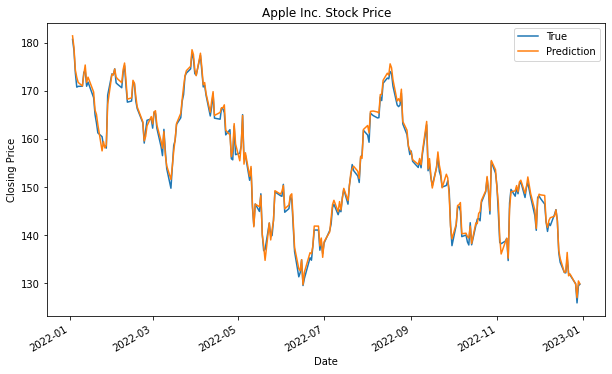

In [12]:
future_df['Adj Close'].plot(figsize=(10, 6), title='Apple Inc. Stock Price')
future_df['target'].plot(figsize=(10, 6), title='Apple Inc. Stock Price')
plt.legend(['True', 'Prediction'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [13]:
# Evaluate the performance of the model using root mean squared error (RMSE) and R-squared metrics
rmse = np.sqrt(mean_squared_error(future_df['target'], future_df['Adj Close']))
r2 = r2_score(future_df['target'], future_df['Adj Close'])
print("RMSE:", rmse)
print("R-squared:", r2)

RMSE: 0.9218414785942689
R-squared: 0.9948839762737227
